# Install packages

In [1]:
!pip install pandas matplotlib seaborn scipy windrose 



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# !pip freeze > ../requirements.txt

# Importing libraries

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes


Extract datasets from the data.zip

In [4]:
# import sys
# sys.path.append('..')

# from app.utils import extract_datasets

# # data_folder = "/content/drive/MyDrive/data/"
data_folder = r"../"
# data_path = os.path.join(data_folder, "data.zip")
# extract_datasets(data_path, data_folder)


# Load dataset togo-dapaong_qc.csv and make initial analysis

In [5]:
data_folder = os.path.join(data_folder, "data")
df = pd.read_csv(os.path.join(data_folder, "togo-dapaong_qc.csv"))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [6]:
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [7]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [8]:
# Check for missing values
df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [9]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

# Statistics summary

In [10]:
# Summary statistics for numeric columns
df[['GHI', 'DNI', 'DHI', 'Tamb']].describe()

,GHI,DNI,DHI,Tamb
count,525600.000000,525600.000000,525600.000000,525600.000000
mean,230.555040,151.258469,116.444352,27.751788
std,322.532347,250.956962,156.520714,4.758023
min,-12.700000,0.000000,0.000000,14.900000
25%,-2.200000,0.000000,0.000000,24.200000
50%,2.100000,0.000000,2.500000,27.200000
75%,442.400000,246.400000,215.700000,31.100000
max,1424.000000,1004.500000,805.700000,41.400000


In [11]:
# Median of GHI
df['GHI'].median()

np.float64(2.1)

In [12]:
# Median of DNI
df['DNI'].median()

np.float64(0.0)

In [13]:
# Median of DHI
df['DHI'].median()

np.float64(2.5)

In [14]:
# Median of Tamb
df['Tamb'].median()

np.float64(27.2)

Ploting GHI, DNI and DHI

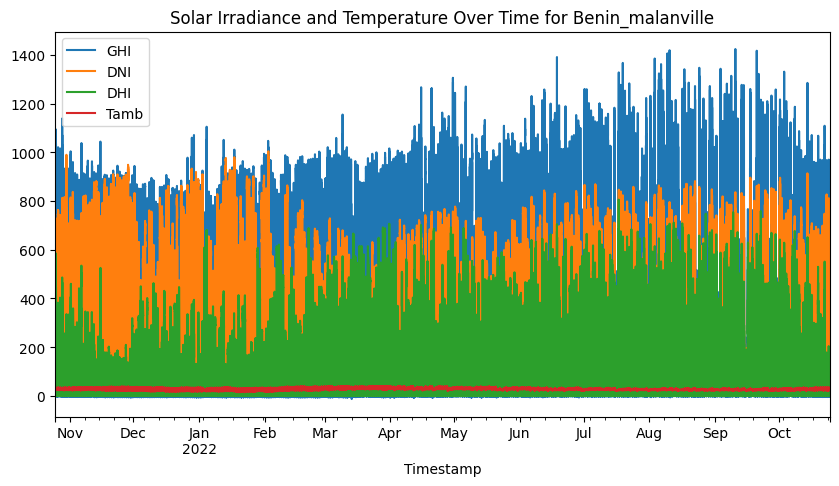

In [15]:
# Plotting time series trends for Benin_malanville dataset for the numeric columns
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(10, 5), title='Solar Irradiance and Temperature Over Time for Benin_malanville')
plt.show()

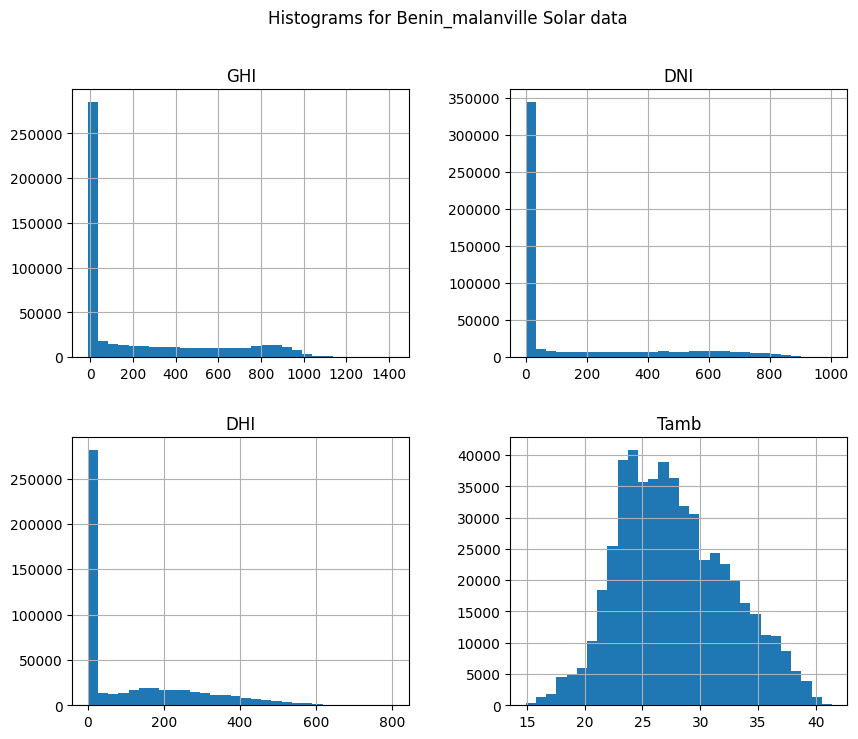

In [16]:
df[['GHI', 'DNI', 'DHI', 'Tamb']].hist(bins=30, figsize=(10, 8))
plt.suptitle('Histograms for Benin_malanville Solar data')
plt.show()

Check for potential outliers

In [17]:
zscores = df[['GHI', 'DNI', 'DHI']].apply(zscore)
# zscores = df[['GHI', 'DNI', 'DHI', 'Tamb']].apply(zscore)
# zscores = df.apply(zscore)
zscores

,GHI,DNI,DHI
Timestamp,,,
2021-10-25 00:01:00,-0.718859,-0.602727,-0.743956
2021-10-25 00:02:00,-0.718859,-0.602727,-0.743956
2021-10-25 00:03:00,-0.718859,-0.602727,-0.743956
2021-10-25 00:04:00,-0.718549,-0.602727,-0.743956
2021-10-25 00:05:00,-0.718549,-0.602727,-0.743956
...,...,...,...
2022-10-24 23:56:00,-0.717309,-0.602727,-0.743956
2022-10-24 23:57:00,-0.717619,-0.602727,-0.743956
2022-10-24 23:58:00,-0.717929,-0.602727,-0.743956


In [18]:
# outliers = (zscores > 3).any(axis=1)
outliers = (zscores.abs() > 3).any(axis=1)
outliers.sum()

np.int64(4714)

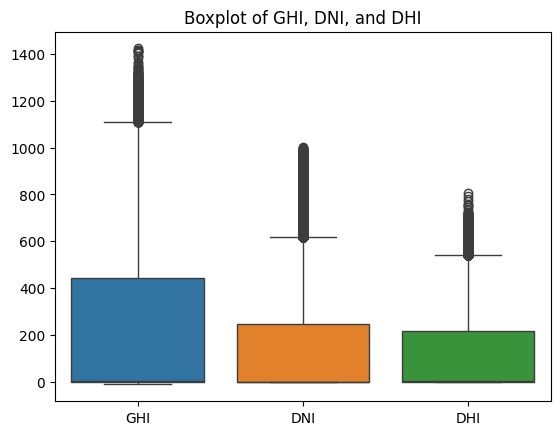

In [19]:
sns.boxplot(data=df[['GHI', 'DNI', 'DHI']])
plt.title('Boxplot of GHI, DNI, and DHI')
plt.show()

<Axes: >

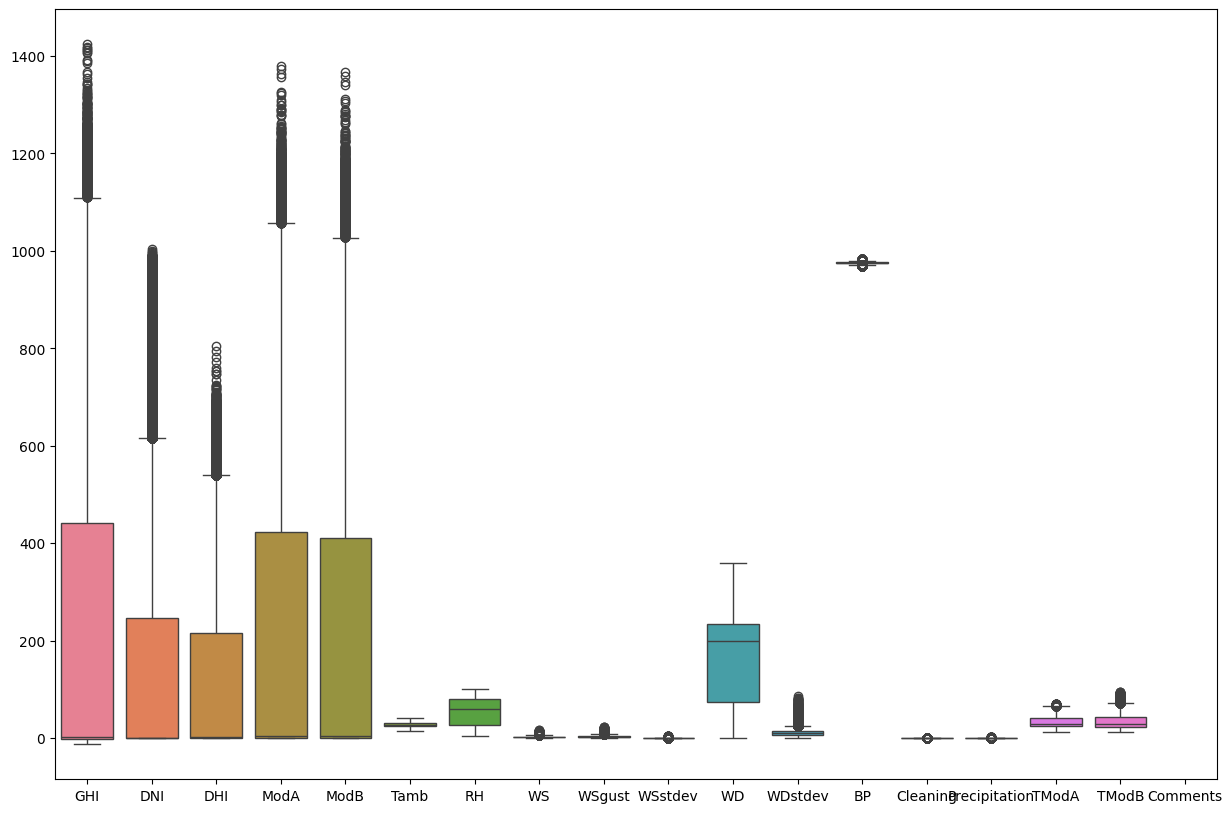

In [20]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)

Data Cleaning

In [21]:
# missing data
df.fillna(method='ffill', inplace=True) # forward fill
# df.fillna(method='bfill', inplace=True) # backward fill

C:\Users\Darkles\AppData\Local\Temp\ipykernel_17312\2401482676.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True) # forward fill


In [22]:
# drop duplicates
df.drop_duplicates(inplace=True)

Visializations and Correlation Analysis

In [23]:
correlation = df.corr()
correlation

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
GHI,1.000000,0.877006,0.851601,0.994948,0.995425,0.561232,-0.254597,0.418635,0.441086,0.396426,0.083140,0.476882,0.060820,0.024663,-0.034858,0.897945,0.919012,NaN
DNI,0.877006,1.000000,0.531475,0.889447,0.889452,0.503316,-0.325629,0.364054,0.382447,0.340702,-0.024641,0.395255,0.048865,0.019714,-0.031604,0.765348,0.783080,NaN
DHI,0.851601,0.531475,1.000000,0.832501,0.832110,0.488047,-0.150599,0.387028,0.407119,0.363018,0.147796,0.451398,0.054047,0.026119,-0.033599,0.801652,0.819751,NaN
ModA,0.994948,0.889447,0.832501,1.000000,0.999562,0.559820,-0.283801,0.417317,0.439764,0.395390,0.050099,0.470093,0.065885,0.022458,-0.034571,0.886586,0.906548,NaN
ModB,0.995425,0.889452,0.832110,0.999562,1.000000,0.554815,-0.276782,0.418524,0.440778,0.395811,0.054074,0.469665,0.070467,0.023418,-0.034526,0.885244,0.906177,NaN
Tamb,0.561232,0.503316,0.488047,0.559820,0.554815,1.000000,-0.396107,0.190635,0.214552,0.219601,0.086638,0.356389,-0.521044,0.019324,-0.060589,0.804866,0.739840,NaN
RH,-0.254597,-0.325629,-0.150599,-0.283801,-0.276782,-0.396107,1.000000,-0.137423,-0.120117,-0.061438,0.542563,-0.063580,0.223305,-0.006963,0.068915,-0.240227,-0.220004,NaN
WS,0.418635,0.364054,0.387028,0.417317,0.418524,0.190635,-0.137423,1.000000,0.977232,0.722844,0.149984,0.496355,0.092191,0.008210,0.099910,0.323350,0.348743,NaN
WSgust,0.441086,0.382447,0.407119,0.439764,0.440778,0.214552,-0.120117,0.977232,1.000000,0.823891,0.170364,0.553740,0.090504,0.009283,0.108393,0.352604,0.376198,NaN
WSstdev,0.396426,0.340702,0.363018,0.395390,0.395811,0.219601,-0.061438,0.722844,0.823891,1.000000,0.223824,0.584413,0.070786,0.010738,0.106046,0.340614,0.354939,NaN


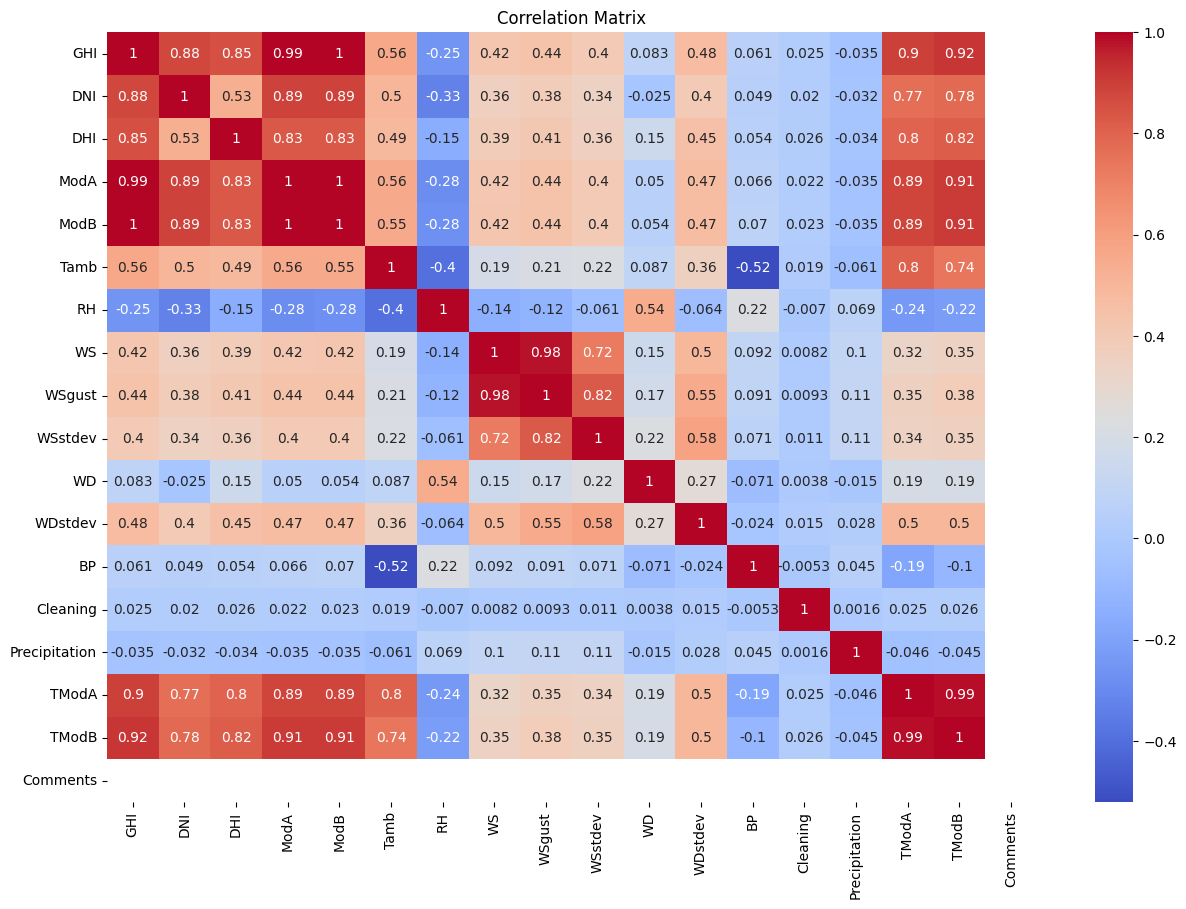

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

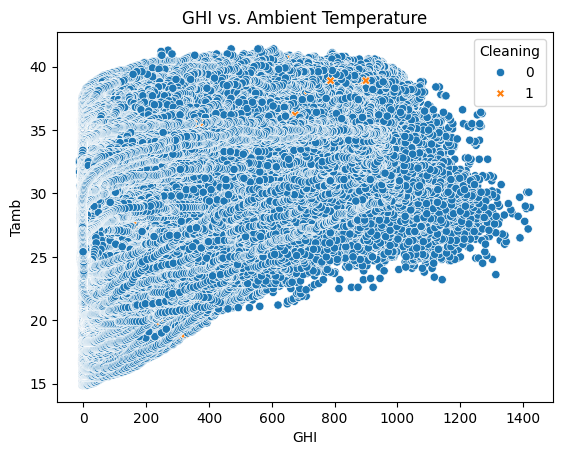

In [25]:
sns.scatterplot(x='GHI', y='Tamb', data=df, hue='Cleaning', style='Cleaning')
plt.title('GHI vs. Ambient Temperature')
plt.show()

Impact of the cleaning analysis done

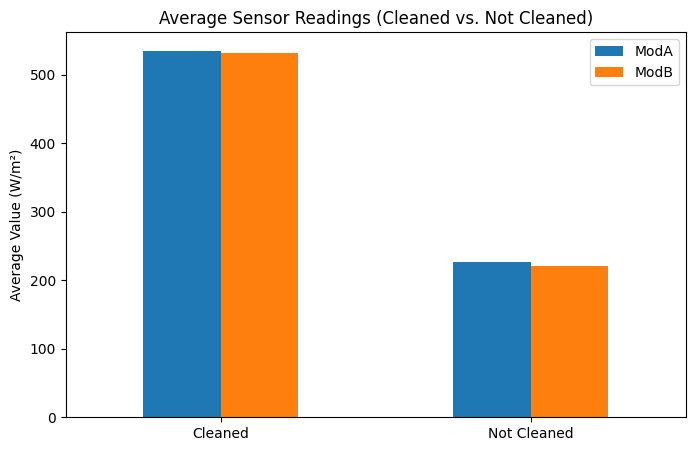

In [26]:
# Group data by Cleaning status
cleaned_data = df[df['Cleaning'] == 1]
not_cleaned_data = df[df['Cleaning'] == 0]

# Calculate average readings
avg_cleaned = cleaned_data[['ModA', 'ModB']].mean()
avg_not_cleaned = not_cleaned_data[['ModA', 'ModB']].mean()

# Bar chart comparison
avg_df = pd.DataFrame({'Cleaned': avg_cleaned, 'Not Cleaned': avg_not_cleaned}).T
avg_df.plot(kind='bar', figsize=(8, 5))
plt.title('Average Sensor Readings (Cleaned vs. Not Cleaned)')
plt.ylabel('Average Value (W/m²)')
plt.xticks(rotation=0)
plt.show()


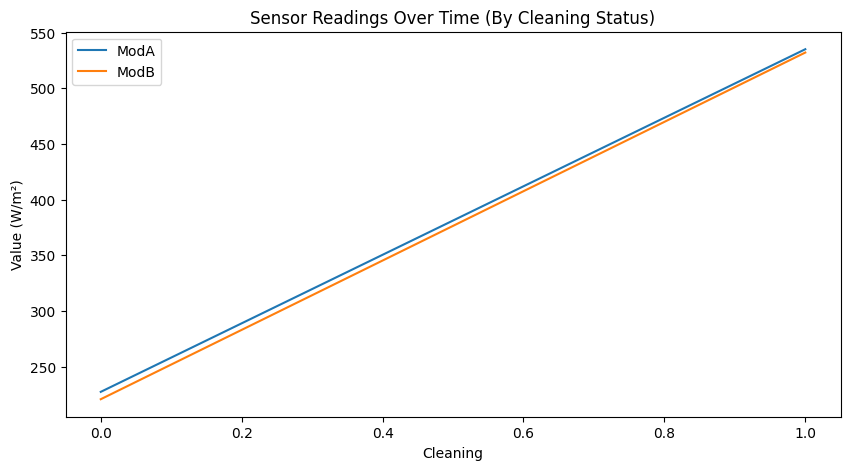

In [27]:
# check trends over time
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='line', figsize=(10, 5))
plt.title('Sensor Readings Over Time (By Cleaning Status)')
plt.ylabel('Value (W/m²)')
plt.show()

# Advanced Analysis with Correlation and Pair Plots

Wind analysis

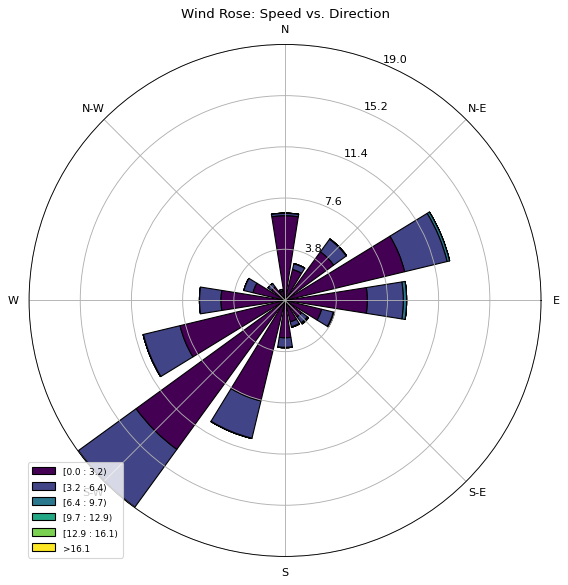

In [28]:
# Create a wind rose visualization to analyze speed and direction
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='black')
ax.set_title('Wind Rose: Speed vs. Direction')
ax.set_legend()
plt.show()

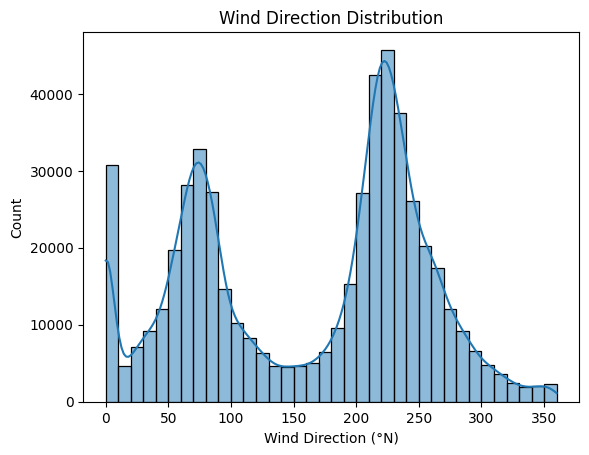

In [29]:
# Analyze wind direction variability
sns.histplot(df['WD'], kde=True, bins=36)
plt.title('Wind Direction Distribution')
plt.xlabel('Wind Direction (°N)')
plt.show()

Temperature and Humidity Analysis

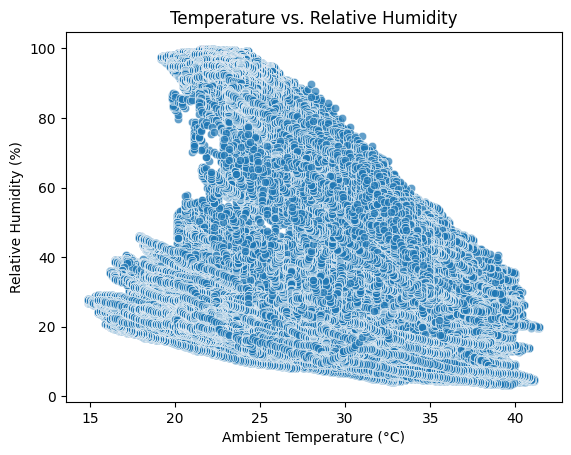

In [30]:
# Analyze the relationship between temperature and relative humidity
sns.scatterplot(x='Tamb', y='RH', data=df, alpha=0.7)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


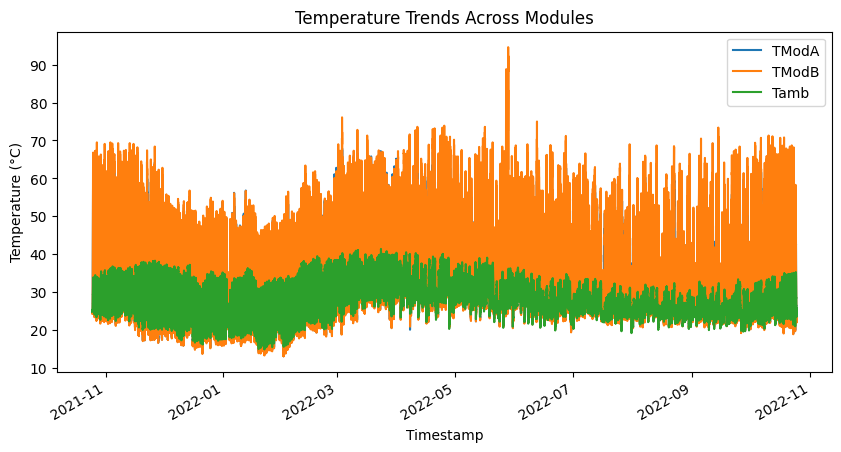

In [31]:
# Investigate temperature variations across modules
df[['TModA', 'TModB', 'Tamb']].plot(figsize=(10, 5))
plt.title('Temperature Trends Across Modules')
plt.ylabel('Temperature (°C)')
plt.show()


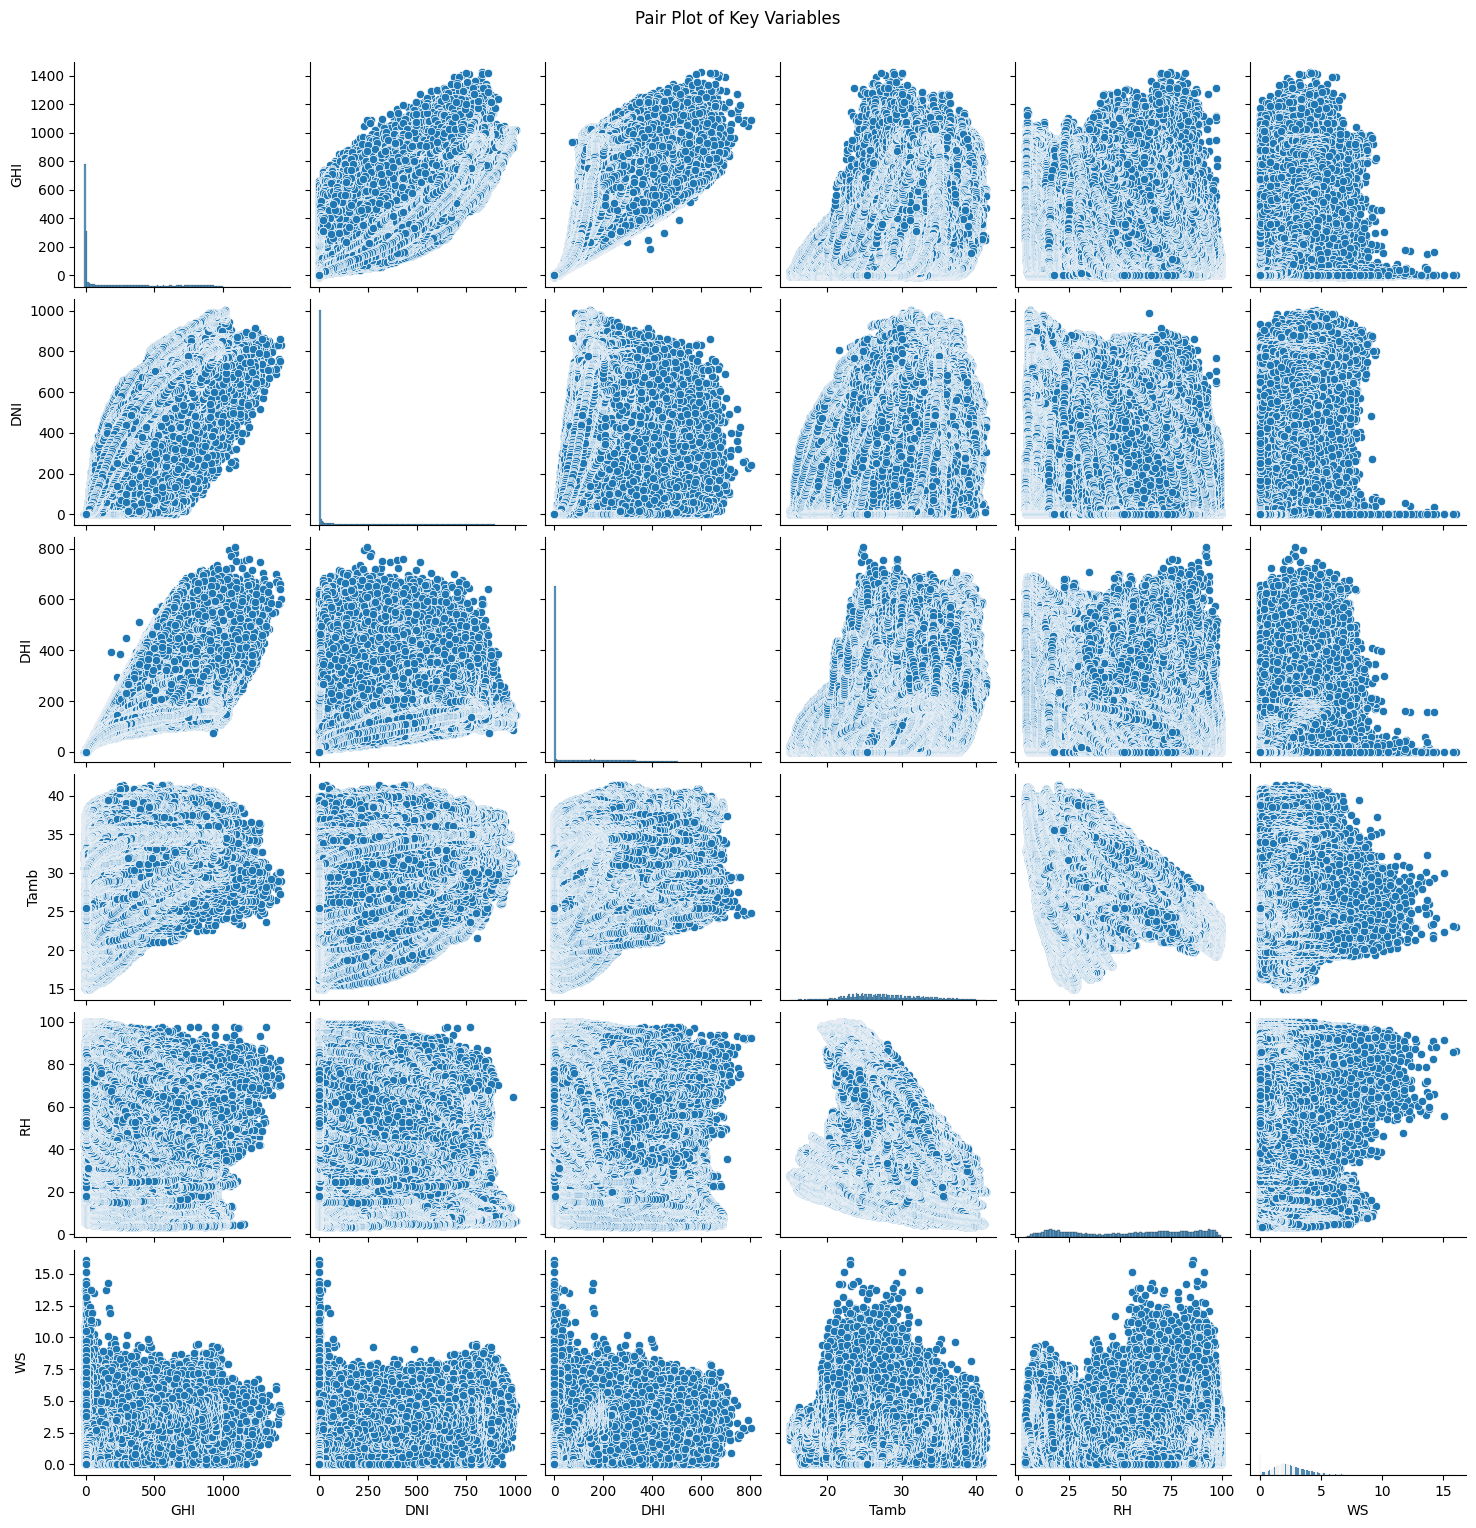

In [32]:
# Generate a pair plot
sns.pairplot(df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']])
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

In [33]:
# Identify strong correlations between GHI, DNI, DHI Tamb, RH and WS
df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']].corr()

,GHI,DNI,DHI,Tamb,RH,WS
GHI,1.000000,0.877006,0.851601,0.561232,-0.254597,0.418635
DNI,0.877006,1.000000,0.531475,0.503316,-0.325629,0.364054
DHI,0.851601,0.531475,1.000000,0.488047,-0.150599,0.387028
Tamb,0.561232,0.503316,0.488047,1.000000,-0.396107,0.190635
RH,-0.254597,-0.325629,-0.150599,-0.396107,1.000000,-0.137423
WS,0.418635,0.364054,0.387028,0.190635,-0.137423,1.000000


 Z-Score and Outlier Detection for GHI, DNI and DHI

In [34]:
# Flag extreme outliers using Z-scores
z_scores = df[['GHI', 'DNI', 'DHI']].apply(zscore)
outlier_df = df[z_scores.abs() > 3].dropna()
outlier_df # Number of outliers detected

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,


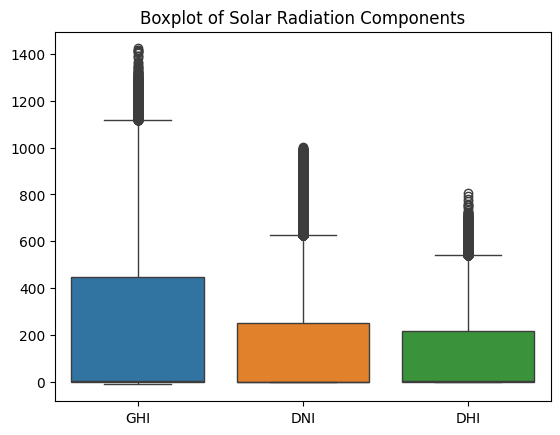

In [35]:
# Visualize outliers
sns.boxplot(data=df[['GHI', 'DNI', 'DHI']])
plt.title('Boxplot of Solar Radiation Components')
plt.show()
